In [3]:
%load_ext autoreload
import sys
sys.path.append("..")


In [4]:
%matplotlib inline

In [5]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
import numpy as np

import darkhistory.physics as phys
from darkhistory.history.tla import get_history

import main
import config
from tqdm import tqdm_notebook as tqdm


from astropy.io import fits



In [118]:
log10eng0 = 3.6989700794219966
log10eng_arr = np.array([log10eng0 + 0.23252559*i for i in np.arange(40)])

log10eng_arr = np.log10(10**log10eng_arr + phys.me)
log10eng_arr[-1] = 12.60

f_idl_low = np.zeros((log10eng_arr.size, 5, 6398))
f_idl_high = np.zeros_like(f_idl_low)


In [115]:
log10eng_arr[8:16]

array([5.94120711, 6.05308337, 6.19544756, 6.3649522 , 6.55583842,
       6.76199572, 6.97830735, 7.20105209])

In [111]:
result_decay = [
    main.evolve(
        primary='elec_delta',
        DM_process='decay', mDM=eng*2, lifetime=3e26,
        start_rs = 3000, end_rs=5.1,
        coarsen_factor=12, backreaction=False
    ) for eng in 10**log10eng_arr[8:16]
]

In [119]:
float_formatter = lambda x,n: ("{:."+str(n)+"E}").format(x,n)
    
for log10eng,f_low,f_high  in zip(tqdm(log10eng_arr), f_idl_low, f_idl_high):
    
    eng_string = float_formatter(log10eng,3)
    file = '/Users/hongwan/Dropbox (MIT)/Photon Deposition/idl_comparison/GR_Checks/ih_continuous_elec/calcfracs_tf_z_3.000E+03_nstep_6398_logE_'+eng_string+'_xe_0.000E+00.fits'
    hdul = fits.open(file)
    data = hdul[1].data
    f_low *= 0
    f_high *= 0
    f_low += data.field('loweng_deposition_fractions')[0]
    f_high += data.field('higheng_deposition_fractions')[0]
    idl_redshift   = data.field('redshift')[0]
    hdul.close()

In [112]:
f_low_H_ion_arr = np.array([res['f']['low']['H ion'] for res in result_decay])
f_low_He_ion_arr = np.array([res['f']['low']['He ion'] for res in result_decay])
f_low_exc_arr = np.array([res['f']['low']['exc'] for res in result_decay])
f_low_heat_arr = np.array([res['f']['low']['heat'] for res in result_decay])
f_low_cont_arr = np.array([res['f']['low']['cont'] for res in result_decay])

f_high_H_ion_arr = np.array([res['f']['high']['H ion'] for res in result_decay])
f_high_He_ion_arr = np.array([res['f']['high']['He ion'] for res in result_decay])
f_high_exc_arr = np.array([res['f']['high']['exc'] for res in result_decay])
f_high_heat_arr = np.array([res['f']['high']['heat'] for res in result_decay])
f_high_cont_arr = np.array([res['f']['high']['cont'] for res in result_decay])


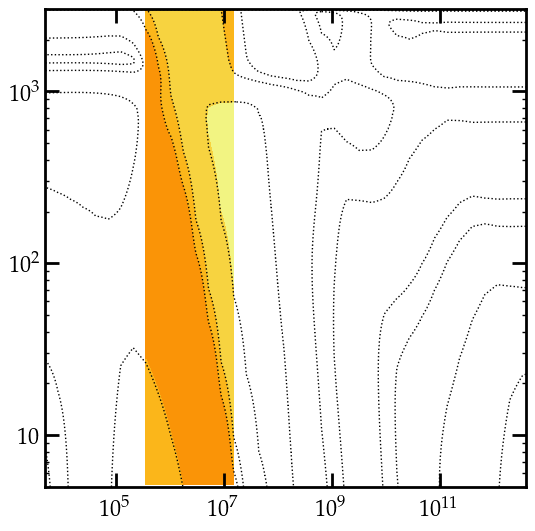

In [131]:
plt.figure()

plt.loglog()

ax = plt.gca()


ax.contourf(
    10**log10eng_arr[8:16] - phys.me, result_decay[0]['rs'], 
    np.transpose(np.log10(f_low_H_ion_arr + f_high_H_ion_arr)), 
    levels = np.log10([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]),
#     norm=matplotlib.colors.LogNorm(),
    cmap=matplotlib.cm.inferno
)

ax.contour(
    10**log10eng_arr - phys.me, idl_redshift, 
    np.transpose(np.log10(f_idl_low[:,0,:] + f_idl_high[:,0,:])), 
    levels = np.log10([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]), linestyles=':', linewidths=1, colors='k'
)

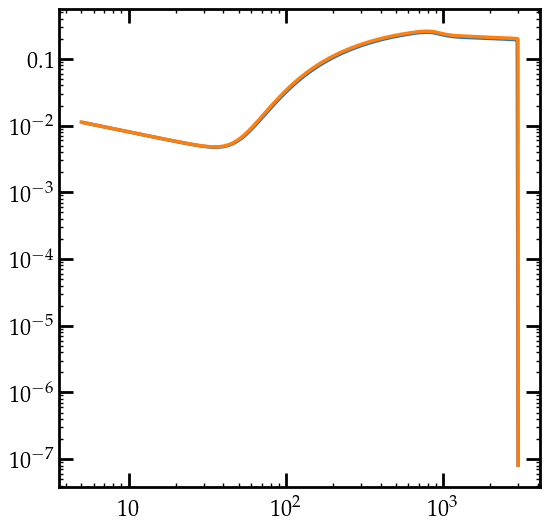

In [121]:
plt.figure()
plt.loglog()

plt.plot(result_decay[4]['rs'], f_low_H_ion_arr[4])
plt.plot(idl_redshift, f_idl_low[12,0,:])